In [2]:
import sys
sys.path.append('localmodules')
import numpy as np
import pandas as pd
import localmodules.ds_charts as ds
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
import localmodules.conversor as c

In [2]:
#Definição variáveis iniciais
file = './zDatabase/XAI - Limpo_dummified_smote_minmax.csv'
fileTrain = './zDatabase/XAI - Limpo_dummified_smote_minmax_train.csv'
fileTest = './zDatabase/XAI - Limpo_dummified_smote_minmax_test.csv'

name = 'XAI - Limpo_dummified_smote_minmax'
tc = 'surgycal margin'
data = pd.read_csv(file,index_col=tc,na_values='',sep=',', decimal='.')
df = pd.DataFrame(data)
rfb = joblib.load('./zDatabase/randomforests.joblib')

train: pd.DataFrame = pd.read_csv(fileTrain)
trnY: np.ndarray = train.pop(tc).values
trnX: np.ndarray = train.values
labels = pd.unique(trnY)
labels.sort()

test: pd.DataFrame = pd.read_csv(fileTest)
tstY: np.ndarray = test.pop(tc).values
tstX: np.ndarray = test.values

In [3]:
#Previsão
#[Age.at.MRI,Prostate.volume,PSA.value.at.MRI,Index.lesion.PIRADS.V2,Index.lesion.size,
# Capsular.contact.lenght_TLC,Smooth.capsular.bulging,Capsular.disruption,Unsharp.margin,
# Irregular.contour,Black.estrition.periprostatic.fat,Retoprostatic.angle.obliteration,
# Measurable.ECE,ECE.in.prostatectomy.specimen_gold.standard,Gleason.score,regra,surgycal margin] L=17
##-----------------------------------------------------------------------------------------------##
#[Age.at.MRI,Prostate.volume,PSA.value.at.MRI,Index.lesion.size,Capsular.contact.lenght_TLC,
# Smooth.capsular.bulging,Capsular.disruption,Unsharp.margin,Irregular.contour,Black.estrition.periprostatic.fat,
# Retoprostatic.angle.obliteration,Measurable.ECE,ECE.in.prostatectomy.specimen_gold.standard,Gleason.score
# regra,Index.lesion.PIRADS.V2_3,Index.lesion.PIRADS.V2_4,Index.lesion.PIRADS.V2_5,surgycal margin] L=19

#Conversão -> Transformação valor na posição [3] para 
col = ['Age.at.MRI','Prostate.volume','PSA.value.at.MRI','Index.lesion.size',
       'Capsular.contact.lenght_TLC','Smooth.capsular.bulging','Capsular.disruption','Unsharp.margin',
       'Irregular.contour','Black.estrition.periprostatic.fat','Retoprostatic.angle.obliteration',
       'Measurable.ECE','ECE.in.prostatectomy.specimen_gold.standard','Gleason.score','regra',
       'Index.lesion.PIRADS.V2_3','Index.lesion.PIRADS.V2_4','Index.lesion.PIRADS.V2_5','surgycal margin']
X = [0.444078947,0.2,0.352631579,0.37037037,0.05,0,0,0,0,0,0,0,0,0,1,0,0,1,0]
XX = c.dumm(X)
XXX = c.minmax(XX,data)
XXX.pop(-1)
Y = [XXX]

pred = rfb.predict(Y)
print("Input=%s, Predicted=%s" % (Y, pred))

Input=[[0.444078947, 0.2, 0.352631579, 0.05, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], Predicted=[0]


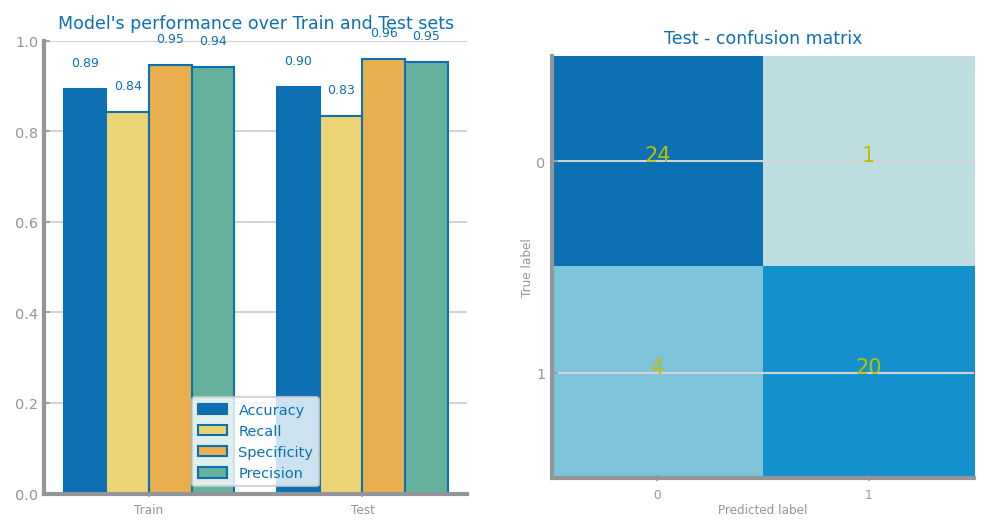

In [4]:
#Confusion Matrix
prd_trn = rfb.predict(trnX)
prd_tst = rfb.predict(tstX)
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
plt.savefig(f'images/Finalmodel_Performance.png')
plt.show()

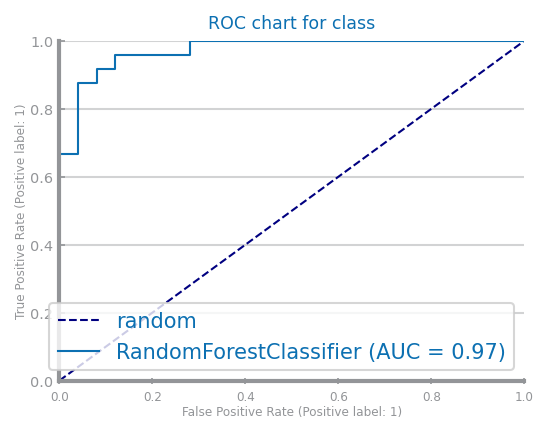

In [5]:
#ROC chart
def plot_roc_chart(models: dict, tstX: np.ndarray, tstY: np.ndarray, ax: plt.Axes = None, target: str = 'class'):
    if ax is None:
        ax = plt.gca()
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 1.0)
    ax.set_xlabel('FP rate')
    ax.set_ylabel('TP rate')
    ax.set_title('ROC chart for %s' % target)

    ax.plot([0, 1], [0, 1], color='navy', label='random', linewidth=1, linestyle='--',  marker='')
    for clf in models.keys():
        plot_roc_curve(models[clf], tstX, tstY, ax=ax, marker='', linewidth=1)
    ax.legend(loc="lower right")


plt.figure()
plot_roc_chart({'RandomForest': rfb}, tstX, tstY, target='class')
plt.savefig(f'images/Finalmodel_ROC_chart.png')
plt.show()

In [5]:

import os
import pandas as pd
import numpy as np
a=[np.array([[-0.02545261,  0.01831499,  0.05079205, -0.05636974,  0.03417151,
         0.02574948,  0.08079412,  0.03674039,  0.02841236,  0.00499421,
        -0.00037963, -0.004725  ,  0.02216373, -0.0001944 ,  0.02418334,
        -0.00819821, -0.00392014, -0.03919253]]), np.array([[ 0.02545261, -0.01831499, -0.05079205,  0.05636974, -0.03417151,
        -0.02574948, -0.08079412, -0.03674039, -0.02841236, -0.00499421,
         0.00037963,  0.004725  , -0.02216373,  0.0001944 , -0.02418334,
         0.00819821,  0.00392014,  0.03919253]])]

In [7]:
a0=a[0].round(4)
a0

array([[-0.0255,  0.0183,  0.0508, -0.0564,  0.0342,  0.0257,  0.0808,
         0.0367,  0.0284,  0.005 , -0.0004, -0.0047,  0.0222, -0.0002,
         0.0242, -0.0082, -0.0039, -0.0392]])

In [8]:
a.round(4)

AttributeError: 'list' object has no attribute 'round'